# Data Mining in Physics - Exercise 3. - DAGUR : p167 / 3

In [7]:
options(jupyter.plot_scale=1.4)

In [8]:
library(datasets)

In [9]:
df = cars
x = df$speed
y = df$dist

head(df)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


## 1. Fit linear model

In [10]:
# Fit linear model on `cars` dataset
cars.lm = lm(dist ~ speed, data=df)
# Print summary
summary(cars.lm)


Call:
lm(formula = dist ~ speed, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [11]:
anova(cars.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
speed,1,21185.46,21185.4589,89.56711,1.489836e-12
Residuals,48,11353.52,236.5317,NA,NA


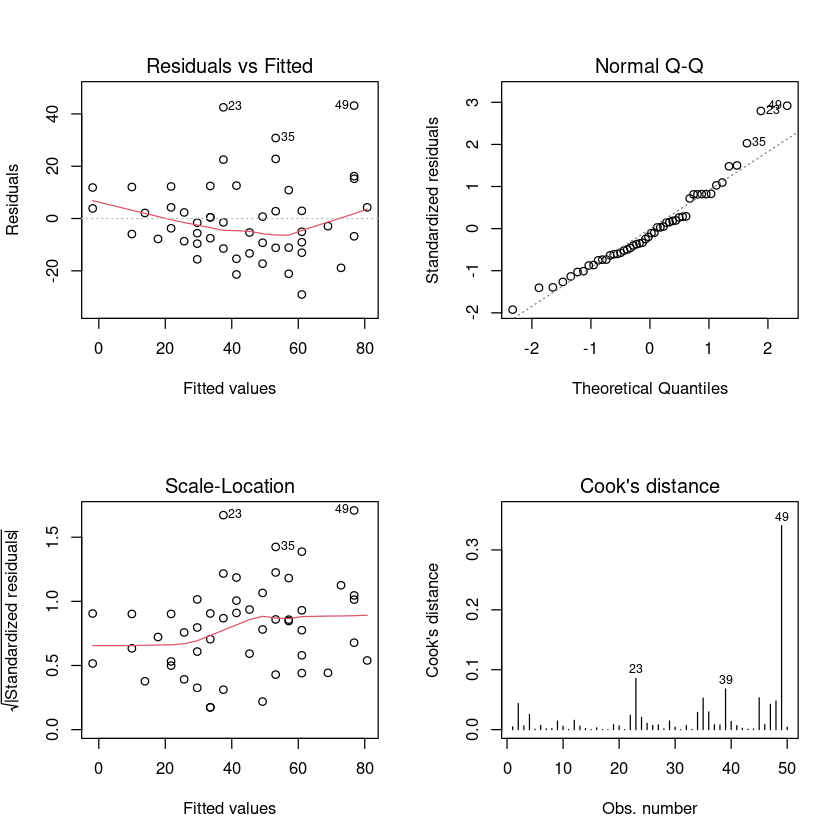

In [12]:
par(mfrow=c(2,2))

plot(cars.lm, which=1:4)
# By default, plots 1:3 and 5 [which=c(1:3,5)] are given
par(mfrow=c(1,1))

In [53]:
# Confidence interval calculations
SEb = summary(cars.lm)$coefficients[2, 2]
coef(cars.lm)[2] + qt(c(0.025, 0.975), length(x))*SEb

[1] 3.097827 4.766991

In [54]:
# Obtain fitted values and standard errors (SE, then SE.OBS)
fit.with.se = predict(cars.lm, se.fit=TRUE)

In [55]:
# SE : Standard error
fit.with.se$se.fit

[1] 5.212326 5.212326 4.112527 4.112527 3.766297 3.435464 3.124921 3.124921
 [9] 3.124921 2.841330 2.841330 2.593545 2.593545 2.593545 2.593545 2.392719
[17] 2.392719 2.392719 2.392719 2.251451 2.251451 2.251451 2.251451 2.181343
[25] 2.181343 2.181343 2.189244 2.189244 2.274339 2.274339 2.274339 2.428529
[33] 2.428529 2.428529 2.428529 2.639733 2.639733 2.639733 2.895501 2.895501
[41] 2.895501 2.895501 2.895501 3.500187 3.834442 4.183287 4.183287 4.183287
[49] 4.183287 4.543362

In [56]:
# SE.OBS : Precision of predicting an observation
sqrt(fit.with.se$se.fit**2+fit.with.se$residual.scale**2)

[1] 16.23884 16.23884 15.91994 15.91994 15.83404 15.75862 15.69385 15.69385
 [9] 15.69385 15.63985 15.63985 15.59674 15.59674 15.59674 15.59674 15.56460
[17] 15.56460 15.56460 15.56460 15.54351 15.54351 15.54351 15.54351 15.53351
[25] 15.53351 15.53351 15.53462 15.53462 15.54684 15.54684 15.54684 15.57015
[33] 15.57015 15.57015 15.57015 15.60448 15.60448 15.60448 15.64978 15.64978
[41] 15.64978 15.64978 15.64978 15.77286 15.85038 15.93837 15.93837 15.93837
[49] 15.93837 16.03664

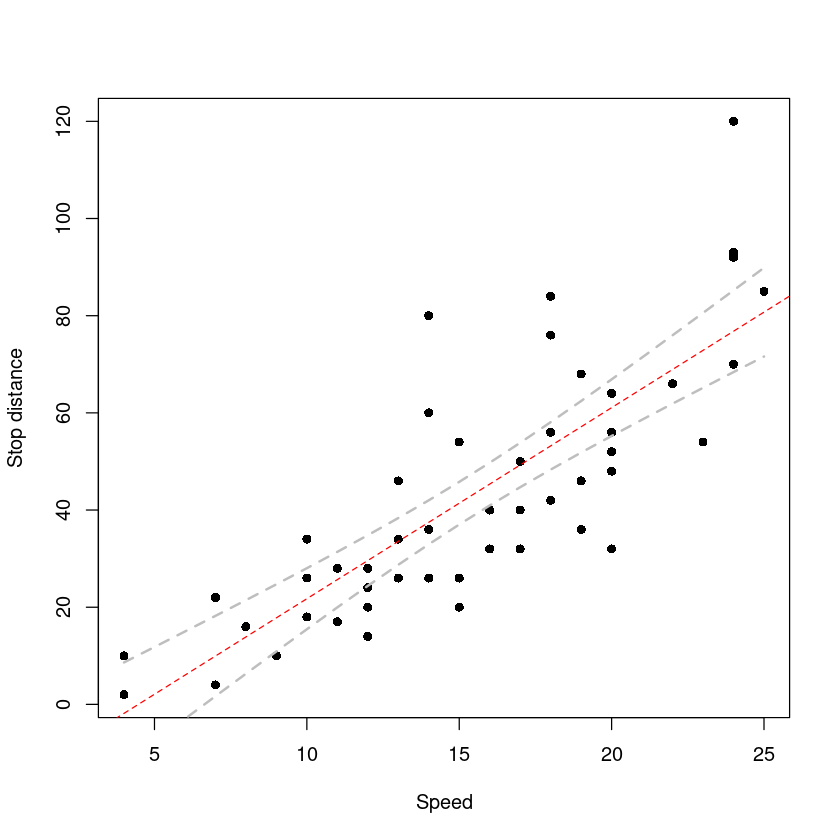

In [70]:
# Plot sale price vs floor area, with 95\% pointwise bounds for the fitted line
plot(dist ~ speed, data=cars,
     xlab = "Speed",
     ylab = "Stop distance", pch = 16)

abline(cars.lm, lty = 2, col='red')

xy = data.frame(speed = pretty(cars$speed, 20))
yhat = predict(cars.lm, newdata = xy, interval="confidence")
ci = data.frame(lower=yhat[, "lwr"], upper=yhat[, "upr"])
lines(xy$speed, ci$lower, lty = 2, lwd=2, col="grey")
lines(xy$speed, ci$upper, lty = 2, lwd=2, col="grey")

## 2. Fit polynomial model

In [58]:
# Fit a quadratic curve
cars.poly = lm(dist ~ poly(speed,2,raw=TRUE), data=df)
summary(cars.poly)


Call:
lm(formula = dist ~ poly(speed, 2, raw = TRUE), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.720  -9.184  -3.188   4.628  45.152 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)
(Intercept)                  2.47014   14.81716   0.167    0.868
poly(speed, 2, raw = TRUE)1  0.91329    2.03422   0.449    0.656
poly(speed, 2, raw = TRUE)2  0.09996    0.06597   1.515    0.136

Residual standard error: 15.18 on 47 degrees of freedom
Multiple R-squared:  0.6673,	Adjusted R-squared:  0.6532 
F-statistic: 47.14 on 2 and 47 DF,  p-value: 5.852e-12


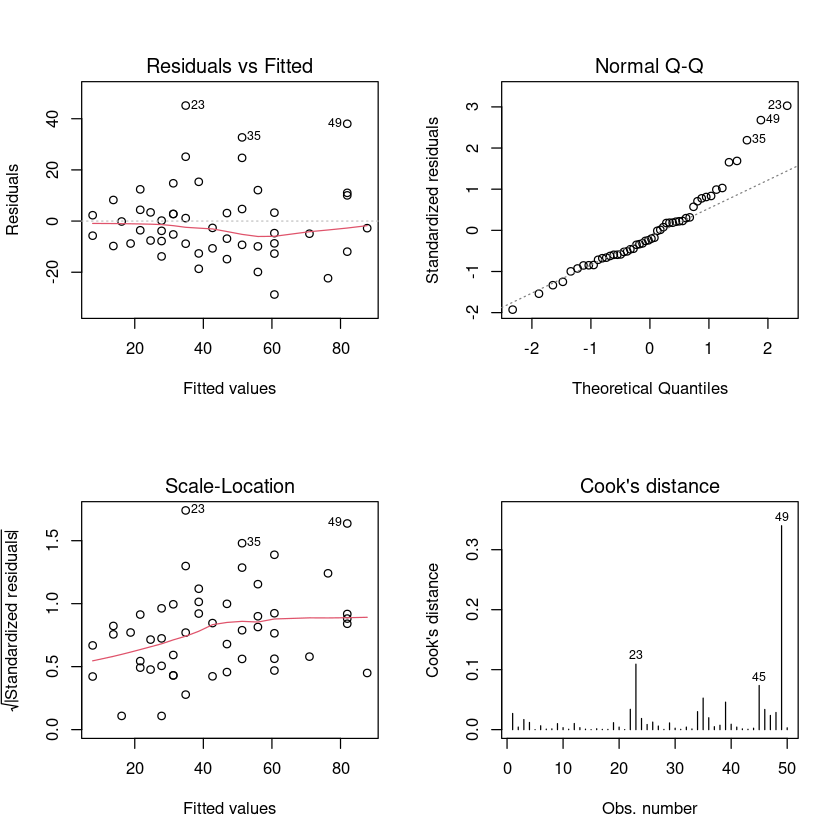

In [59]:
par(mfrow=c(2,2))

plot(cars.poly, which=1:4)
# By default, plots 1:3 and 5 [which=c(1:3,5)] are given
par(mfrow=c(1,1))

In [68]:
anova(cars.poly)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"poly(speed, 2, raw = TRUE)",2,21714.26,10857.1320,47.14075,5.85188e-12
Residuals,47,10824.72,230.3131,NA,NA


In [60]:
# Confidence interval calculations
SEb = summary(cars.poly)$coefficients[2, 2]
coef(cars.poly)[2] + qt(c(0.025, 0.975), length(x))*SEb

[1] -3.172564  4.999140

In [61]:
# Obtain fitted values and standard errors (SE, then SE.OBS)
fit.with.se = predict(cars.poly, se.fit=TRUE)

In [62]:
# SE : Standard error
fit.with.se$se.fit

[1] 8.146163 8.146163 4.775118 4.775118 4.012899 3.450387 3.085076 3.085076
 [9] 3.085076 2.890649 2.890649 2.817628 2.817628 2.817628 2.817628 2.809100
[17] 2.809100 2.809100 2.809100 2.817829 2.817829 2.817829 2.817829 2.814088
[25] 2.814088 2.814088 2.786572 2.786572 2.742158 2.742158 2.742158 2.707115
[33] 2.707115 2.707115 2.707115 2.728110 2.728110 2.728110 2.866478 2.866478
[41] 2.866478 2.866478 2.866478 3.699572 4.428874 5.354171 5.354171 5.354171
[49] 5.354171 6.459151

In [63]:
# SE.OBS : Precision of predicting an observation
sqrt(fit.with.se$se.fit**2+fit.with.se$residual.scale**2)

[1] 17.22420 17.22420 15.90958 15.90958 15.69766 15.56336 15.48647 15.48647
 [9] 15.48647 15.44891 15.44891 15.43542 15.43542 15.43542 15.43542 15.43386
[17] 15.43386 15.43386 15.43386 15.43545 15.43545 15.43545 15.43545 15.43477
[25] 15.43477 15.43477 15.42978 15.42978 15.42182 15.42182 15.42182 15.41563
[33] 15.41563 15.41563 15.41563 15.41933 15.41933 15.41933 15.44441 15.44441
[41] 15.44441 15.44441 15.44441 15.62050 15.80911 16.09286 16.09286 16.09286
[49] 16.09286 16.49345

In [64]:
quadratic = cars.poly$coefficient[3]*x**2 + cars.poly$coefficient[2]**x + cars.poly$coefficient[1]

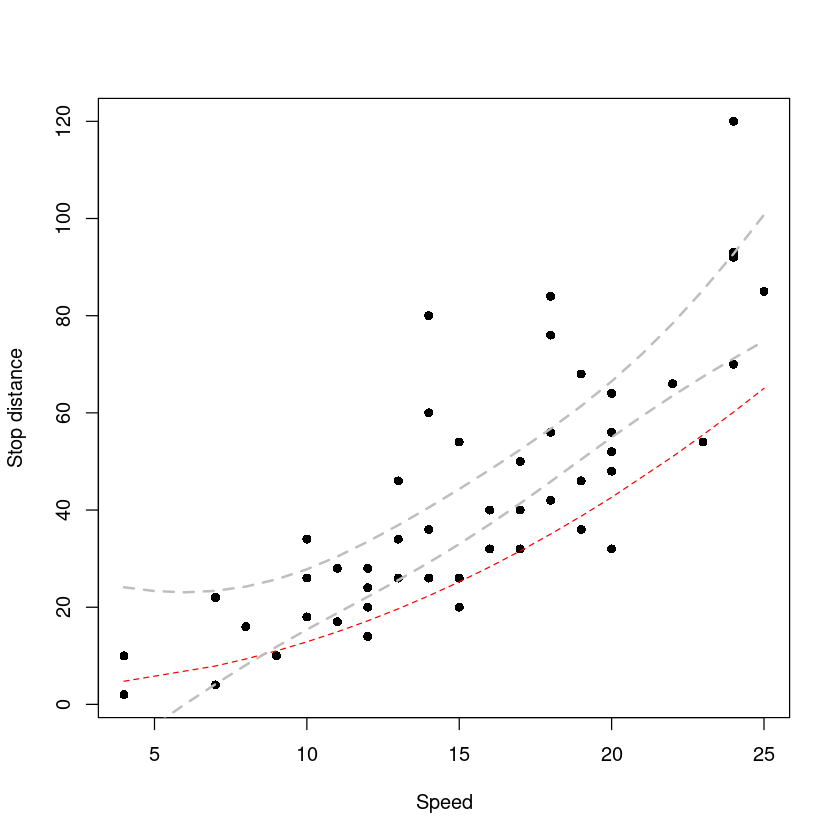

In [69]:
# Plot sale price vs floor area, with 95\% pointwise bounds for the fitted line
plot(dist ~ speed, data=cars,
     xlab = "Speed",
     ylab = "Stop distance", pch = 16)

lines(x, quadratic, lty = 2, col="red")

xy = data.frame(speed = pretty(cars$speed, 20))
yhat = predict(cars.poly, newdata = xy, interval="confidence")
ci = data.frame(lower=yhat[, "lwr"], upper=yhat[, "upr"])
lines(xy$speed, ci$lower, lty = 2, lwd=2, col="grey")
lines(xy$speed, ci$upper, lty = 2, lwd=2, col="grey")